### Tyler's Visualizations for Tech Blues

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle2
import explore2
import tyler_explore

In [2]:
# creating a color palette for charts
malibu = '#7CCDFF'
caribbean_green = '#01D38E'
flamingo = '#EC4C36'
keppel = '#35A2A1'
amber = '#FFBD0B'
# colors = ['#7CCDFF', '#01D38E', '#EC4C36', '#35A2A1', '#FFBD0B']
colors = [keppel, amber, flamingo, malibu, caribbean_green,]
sns.set_palette(sns.color_palette(colors))

In [3]:
# use our 'get_survey_data' function to bring in the data
df = wrangle2.get_survey_data('survey2.csv')

In [4]:
# initial prep for object data
strings_df = wrangle2.prep_the_strings(df)

In [7]:
# initial prep for encoding objects into integers
encoded_df = wrangle2.prep_encode(strings_df)

In [32]:
encoded_df.columns

Index(['unnamed: 0', 'timestamp', 'age', 'gender', 'country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'company_size',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [34]:
encoded_df['mental_health_consequence'].value_counts()

0    376
2    369
1    212
Name: mental_health_consequence, dtype: int64

### Breakdown of gender among entire population

In [8]:
# gender_df = encoded_df['gender']

In [9]:
# type(gender_df)

In [10]:
# plt.figure(figsize=(12,4))
# sns.countplot(y='gender', data=encoded_df, color='#0D3580')
# plt.title('Breakdown of gender among total population', fontsize=16)
# plt.yticks(np.arange(3), ['Male', 'Female', 'Other'])
# plt.xlabel(None)



# plt.show()

In [11]:
hot_df = explore2.one_hot(encoded_df)

In [12]:
gender_df = hot_df[['gender_0', 'gender_1', 'gender_2']]

In [13]:
gender_0 = pd.Series(gender_df['gender_0'].sum())
gender_1 = pd.Series(gender_df['gender_1'].sum())
gender_2 = pd.Series(gender_df['gender_2'].sum())
gender_3 = pd.Series(gender_0 + gender_1 + gender_2)

In [14]:
gender_df = pd.concat([gender_0, gender_1, gender_2, gender_3], axis=1).fillna(0).astype(int)
gender_df.columns = ['male', 'female', 'other', 'all']
gender_df.head()

,male,female,other,all
0,741,205,11,957


In [15]:
import matplotlib as mpl

<Figure size 2160x432 with 0 Axes>

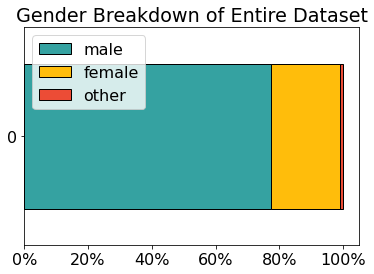

In [16]:
plt.figure(figsize=(30, 6))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(gender_df.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='male')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('Gender Breakdown of Entire Dataset')
plt.ylabel(None)
plt.legend(loc=0)

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

In [17]:
from matplotlib import cm

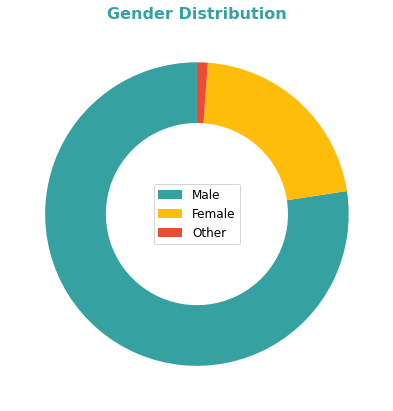

In [48]:
# visualize distribution of gender
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
gender = ['Male', 'Female', 'Other']
data = [741,205,11]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, gender, loc="center",fontsize=12)
ax.set_title("Gender Distribution", color=keppel, fontdict={'fontsize': 16, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('gender_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

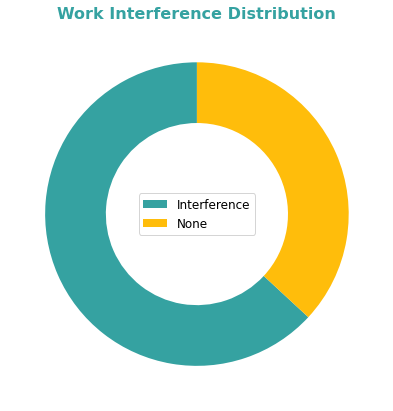

In [49]:
# visualize distribution of target variable
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['Interference', 'None']
data = [604,353]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=12)
ax.set_title("Work Interference Distribution", color=keppel, fontdict={'fontsize': 16, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('interference_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

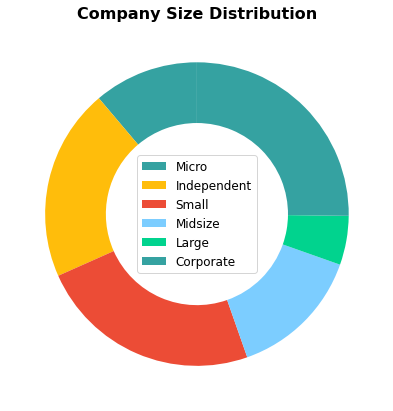

In [50]:
# visualize distribution of company size
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['Micro', 'Independent', 'Small', 'Midsize', 'Large', 'Corporate']
data = [107, 196, 227, 136, 50, 241]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=12)
ax.set_title("Company Size Distribution", fontdict={'fontsize': 16, 'fontweight': 'bold'})
fig.tight_layout()
# plt.savefig('company_size_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

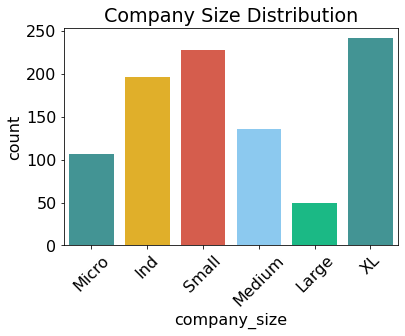

In [51]:
sns.countplot(encoded_df['company_size'], palette=colors)
plt.xticks(np.arange(6), labels=['Micro', 'Ind', 'Small', 'Medium', 'Large', 'XL'], rotation = 45)
plt.title('Company Size Distribution')
plt.savefig('comp_size_countplot.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [22]:
comp_df = hot_df[['company_size_0', 'company_size_1', 'company_size_2', 'company_size_3', 'company_size_4', 'company_size_5']]

In [23]:
company_size_0 = pd.Series(comp_df['company_size_0'].sum())
company_size_1 = pd.Series(comp_df['company_size_1'].sum())
company_size_2 = pd.Series(comp_df['company_size_2'].sum())
company_size_3 = pd.Series(comp_df['company_size_3'].sum())
company_size_4 = pd.Series(comp_df['company_size_4'].sum())
company_size_5 = pd.Series(comp_df['company_size_5'].sum())
company_size_6 = pd.Series(company_size_0 + company_size_1 + company_size_2 + company_size_3 + company_size_4 + company_size_5)

In [24]:
company_size_df = pd.concat([company_size_0, company_size_1, company_size_2, company_size_3, company_size_4, company_size_5, company_size_6], axis=1).fillna(0).astype(int)
company_size_df.columns = ['Micro', 'Ind', 'Small', 'Medium', 'Large', 'XL', 'all']
company_size_df.head()

,Micro,Ind,Small,Medium,Large,XL,all
0,107,196,227,136,50,241,957


<Figure size 2160x432 with 0 Axes>

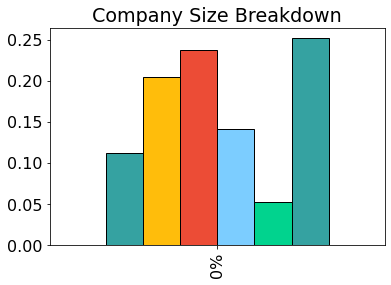

In [25]:
plt.figure(figsize=(30, 6))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(company_size_df.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='Micro')
 .plot.bar(width=1, ec='black', legend=None))
plt.title('Company Size Breakdown')
plt.ylabel(None)
plt.yticks(None)



plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

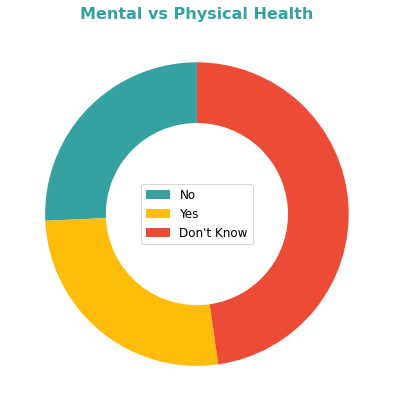

In [52]:
# visualize distribution of mental vs physical 
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes', "Don't Know"]
data = [246, 254, 457]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=12)
ax.set_title("Mental vs Physical Health", color=keppel, fontdict={'fontsize': 16, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('mental_vs_phys_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

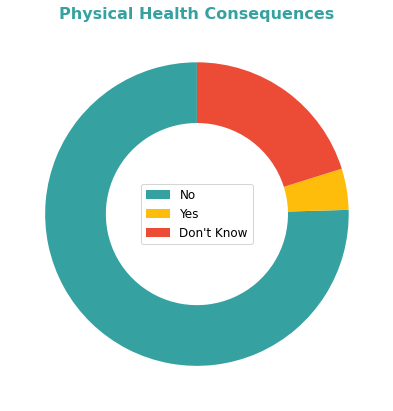

In [53]:
# visualize distribution of phys_health_consequence
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes', "Don't Know"]
data = [722, 42, 193]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=12)
ax.set_title("Physical Health Consequences", color=keppel, fontdict={'fontsize': 16, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('phys_cons_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

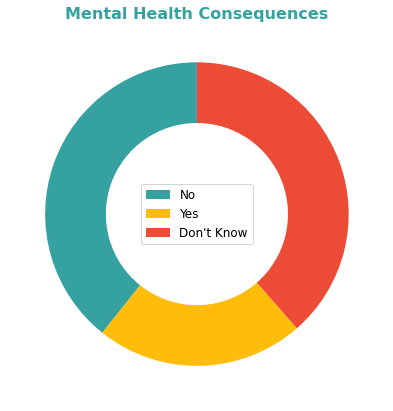

In [54]:
# visualize distribution of mental_health_consequence
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes', "Don't Know"]
data = [376, 212, 369]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=12)
ax.set_title("Mental Health Consequences", color=keppel, fontdict={'fontsize': 16, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('mental_cons_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

## Visuals for Hypotheses